# Gradient Boosting Regression
This machine learning model repeatedly adds decision trees so that the next decision tree corrects the previous decision tree error. Eventually, a prediction result is obtained in the leaf nodes.

In [13]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [14]:
df = pd.read_csv('Datasets/cleaned_customer.csv')
df = df[['Income', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Dt_Customer', 'Recency']]
df.head()

,Income,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Dt_Customer,Recency
0,58138.0,8,10,4,635,88,546,172,88,88,04-09-2012,58
1,46344.0,1,1,2,11,1,6,2,1,6,08-03-2014,38
2,71613.0,8,2,10,426,49,127,111,21,42,21-08-2013,26
3,26646.0,2,0,4,11,4,20,10,3,5,10-02-2014,26
4,58293.0,5,3,6,173,43,118,46,27,15,19-01-2014,94


In [15]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['CurrentDate'] = datetime.datetime(2021, 1, 1)
df['numMonths'] = (df['CurrentDate'] - df['Dt_Customer']) / np.timedelta64(1, 'D') / 30
df['Recency'] = df['Recency'] / 30

In [16]:
#average purchases over the months
for var in df.columns[4:10]:
    df[var] = df[var]/ (df["numMonths"] - df["Recency"])
0
df.drop(columns = ['Dt_Customer', 'CurrentDate', "numMonths", "Recency"], inplace = True)
df

,Income,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,58138.0,8,10,4,6.386188,0.885015,5.491116,1.729802,0.885015,0.885015
1,46344.0,1,1,2,0.134529,0.012230,0.073380,0.024460,0.012230,0.073380
2,71613.0,8,2,10,4.797297,0.551802,1.430180,1.250000,0.236486,0.472973
3,26646.0,2,0,4,0.132477,0.048173,0.240867,0.120434,0.036130,0.060217
4,58293.0,5,3,6,2.122699,0.527607,1.447853,0.564417,0.331288,0.184049
...,...,...,...,...,...,...,...,...,...,...
2211,61223.0,9,3,4,7.840029,0.475488,2.012532,0.464431,1.304829,2.731294
2212,64014.0,8,2,5,5.202905,0.000000,0.384451,0.000000,0.000000,0.102520
2213,56981.0,2,3,13,11.154791,0.589681,2.665848,0.393120,0.147420,0.294840
2214,69245.0,6,5,10,5.083135,0.356295,2.541568,0.950119,0.356295,0.724466


### Removing Outliers

In [17]:
# remove outliers function
def removeOut(dataframe):
    altered = pd.DataFrame() 
    for var in dataframe.select_dtypes(include=['number']): 
        Q1 = dataframe[var].quantile(0.25) 
        Q3 = dataframe[var].quantile(0.75) 
        IQR = Q3 - Q1
        altered[var] = dataframe[var][((dataframe[var] > (Q1 - 1.5 * IQR)) & (dataframe[var] < (Q3 + 1.5 * IQR)))] 
    altered = altered.dropna()
    return altered

In [18]:
df=removeOut(df)
df

,Income,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
1,46344.0,1.0,1.0,2,0.134529,0.012230,0.073380,0.024460,0.012230,0.073380
2,71613.0,8.0,2.0,10,4.797297,0.551802,1.430180,1.250000,0.236486,0.472973
3,26646.0,2.0,0.0,4,0.132477,0.048173,0.240867,0.120434,0.036130,0.060217
4,58293.0,5.0,3.0,6,2.122699,0.527607,1.447853,0.564417,0.331288,0.184049
5,62513.0,6.0,4.0,10,5.875706,0.474576,1.107345,0.000000,0.474576,0.158192
...,...,...,...,...,...,...,...,...,...,...
2210,34421.0,1.0,0.0,2,0.033835,0.033835,0.078947,0.067669,0.022556,0.101504
2212,64014.0,8.0,2.0,5,5.202905,0.000000,0.384451,0.000000,0.000000,0.102520
2213,56981.0,2.0,3.0,13,11.154791,0.589681,2.665848,0.393120,0.147420,0.294840
2214,69245.0,6.0,5.0,10,5.083135,0.356295,2.541568,0.950119,0.356295,0.724466


In [19]:
x=df[['Income', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]
y= df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
train_x, test_x, train_y, test_y = train_test_split(x,y, train_size=0.8, random_state=42)

### Finding the Best Set of Parameters for Final Model
We will now use a variety of learning rates and n-estimators for our Gradient Boosting Regressor model and evaluate their performance by measuring their Mean Squared Error and Accuracy (Explained Variance). This is to determine the most ideal set of parameters for our final model.

In [20]:
for i in [0.1, 0.01, 0.001]:
    for j in [100, 250, 500, 750]:
        base_estimator = GradientBoostingRegressor(learning_rate=i, n_estimators=j)
        print("predict output for GradientBoostingRegressor: learning_rate={}, n_estimators={}".format(i, j))
        # Create an instance of MultiOutputRegressor with the base estimator
        gbt = MultiOutputRegressor(base_estimator)

        # Fit the model to the training data
        gbt.fit(train_x, train_y)

        # Make predictions on the test data
        pred_y = gbt.predict(test_x)

        # Calculate mean squared error
        mse = mean_squared_error(test_y, pred_y)
        print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

        # Calculate root mean square error
        rmse=np.sqrt(mse)
        print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse))

        # Calculate accuracy on training set
        train_accuracy = gbt.score(train_x, train_y)
        print("Accuracy on training set: %.3f" % train_accuracy)

        # Calculate accuracy on test set
        test_accuracy = gbt.score(test_x, test_y)
        print("Accuracy on test set: %.3f" % test_accuracy)

        print("=================================================================")

predict output for GradientBoostingRegressor: learning_rate=0.1, n_estimators=100
The mean squared error (MSE) on test set: 0.4391
The root mean squared error (RMSE) on test set: 0.6627
Accuracy on training set: 0.686
Accuracy on test set: 0.452
predict output for GradientBoostingRegressor: learning_rate=0.1, n_estimators=250
The mean squared error (MSE) on test set: 0.4810
The root mean squared error (RMSE) on test set: 0.6935
Accuracy on training set: 0.813
Accuracy on test set: 0.413
predict output for GradientBoostingRegressor: learning_rate=0.1, n_estimators=500
The mean squared error (MSE) on test set: 0.5324
The root mean squared error (RMSE) on test set: 0.7296
Accuracy on training set: 0.904
Accuracy on test set: 0.369
predict output for GradientBoostingRegressor: learning_rate=0.1, n_estimators=750
The mean squared error (MSE) on test set: 0.5641
The root mean squared error (RMSE) on test set: 0.7511
Accuracy on training set: 0.943
Accuracy on test set: 0.344
predict output f

### Training the Machine Learning Model
According to the above, the parameters that give the highest accuracy, lowest MSE and RMSE on average are:
learning rate = 0.01, n_estimators = 500 such that Accuracy = 0.476, MSE = 0.4335 and RMSE = 0.6591 on test set.

In [21]:
base_estimator = GradientBoostingRegressor(learning_rate=0.01, n_estimators=500)
gbt = MultiOutputRegressor(base_estimator)

gbt = gbt.fit(train_x, train_y)
gbt_pred = gbt.predict(test_x)

predicted_df = pd.DataFrame(gbt_pred, columns=train_y.columns)

# contains the x tester values that were used for prediction of y values
result_df = pd.concat([test_x.reset_index(drop=True), predicted_df], axis=1)
result_df

,Income,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,46984.0,1.0,0.0,3,0.348051,0.011012,0.110901,0.029836,0.014193,0.057762
1,21059.0,3.0,0.0,3,0.181673,0.083546,0.222172,0.081129,0.067032,0.142364
2,65814.0,8.0,2.0,10,5.670764,0.326140,1.439382,0.327418,0.277350,0.507125
3,25545.0,2.0,2.0,3,0.489679,0.094331,0.228025,0.097105,0.095007,0.361675
4,49605.0,2.0,1.0,4,0.671481,0.071919,0.255609,0.094726,0.069774,0.210482
...,...,...,...,...,...,...,...,...,...,...
313,19986.0,0.0,0.0,3,0.137485,0.032784,0.096956,0.057553,0.033111,0.063510
314,68682.0,4.0,9.0,10,8.101871,0.267904,4.048303,0.781869,0.326801,0.446474
315,38725.0,1.0,0.0,4,0.324696,0.055499,0.196640,0.061562,0.039044,0.106440
316,26816.0,0.0,0.0,3,0.137485,0.029228,0.109927,0.048287,0.033111,0.054998


In [22]:
test_y

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
788,0.205999,0.010842,0.108421,0.021684,0.010842,0.086737
1915,0.095579,0.035842,0.227001,0.035842,0.035842,0.095579
1992,6.992106,0.174491,1.408392,0.124636,0.174491,0.436228
511,0.319787,0.009993,0.639574,0.159893,0.119920,0.849434
138,0.542869,0.206807,0.374838,0.155106,0.258509,0.103404
...,...,...,...,...,...,...
648,0.035559,0.071118,0.059265,0.000000,0.023706,0.071118
1205,10.653014,0.000000,5.853941,1.147604,0.347759,0.521638
1741,0.391414,0.000000,0.075758,0.025253,0.012626,0.063131
2208,0.049850,0.009970,0.059821,0.029910,0.039880,0.029910


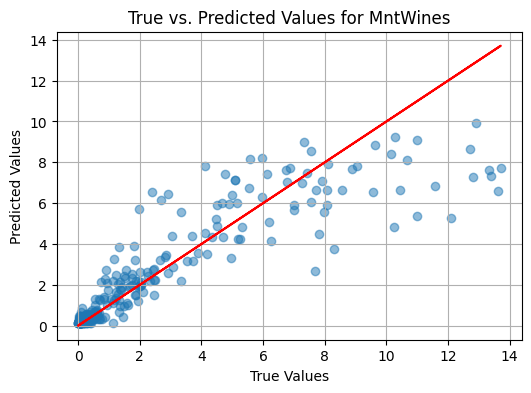

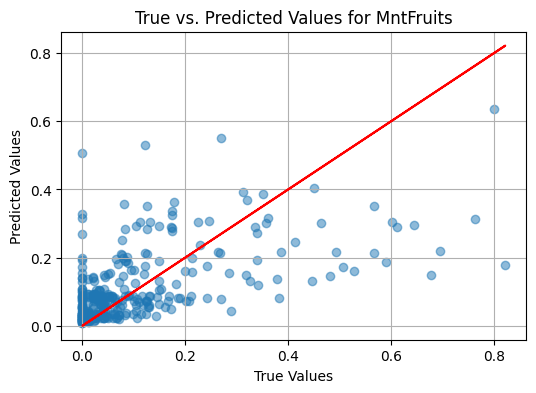

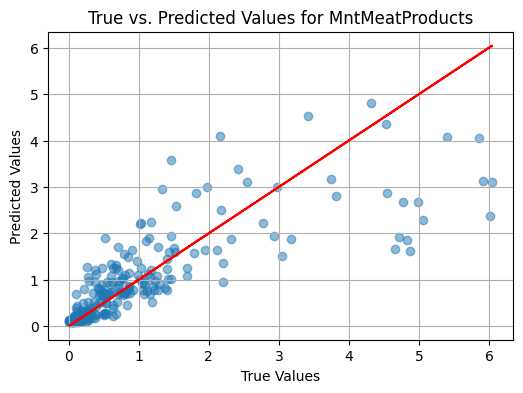

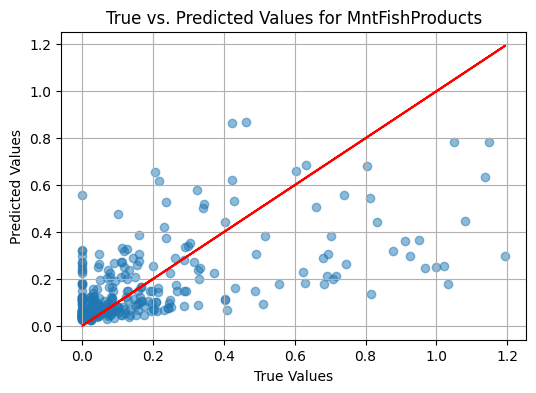

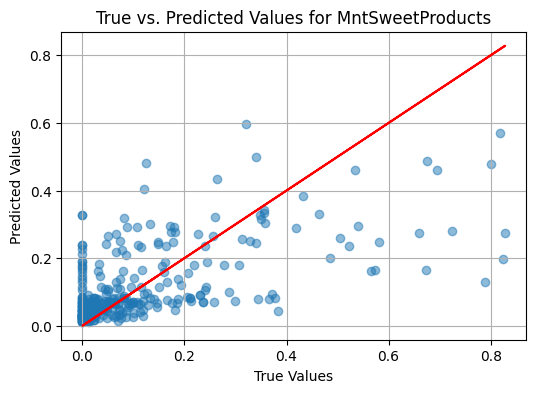

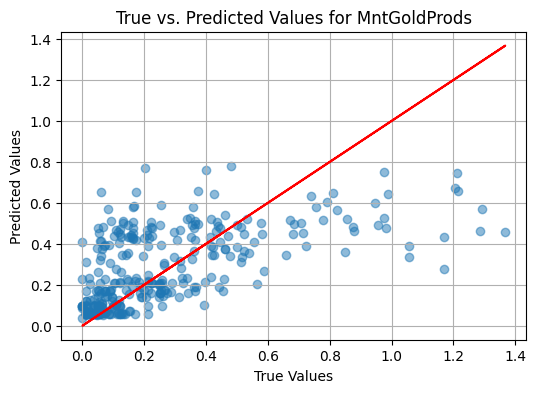

In [23]:
# Create scatter plots for each response variable
for col in test_y.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(test_y[col], result_df[col], alpha=0.5)  # Use test_y[col] for true values
    plt.plot(test_y[col], test_y[col], color='red')  # Plot the diagonal line (perfect predictions)
    plt.title(f"True vs. Predicted Values for {col}")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.grid(True)
    plt.show()

### Observations
The blue dots (scatter) reflect the model's predicted values while the red line reflect the perfect predictions. This shows us the distance between the predicted and actual values, while also giving us a rough visual gauge of how accurate the model is.